<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# 1st COMputing CHAllenges School <a class="tocSkip">

## Hands-on Autoencoders <a class="tocSkip">
  
*Barcelona, October 4th, 2019*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Need Keras? conda install -c conda-forge keras


Download the **Labeled Faces in the Wild (LFW) people dataset**: https://drive.google.com/uc?id=1q49282ENDj0YECpxDfjMJzOZieLfCHh6&export=download, unpack it and put Data folder in the same directory as this jupyter notebook.

Then load it:

In [3]:
lfw_people = fetch_lfw_people(data_home='Data/')

Extract the feature array and rescale features into [0, 1] range and perform a train/test split of the sample:

In [4]:
X = lfw_people.images.astype('float32') / 256.0

X_train, X_test = train_test_split(X, test_size=0.1)

print(X.shape)

(13233, 62, 47)


Inspect the dataset:

/home/acamboni/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


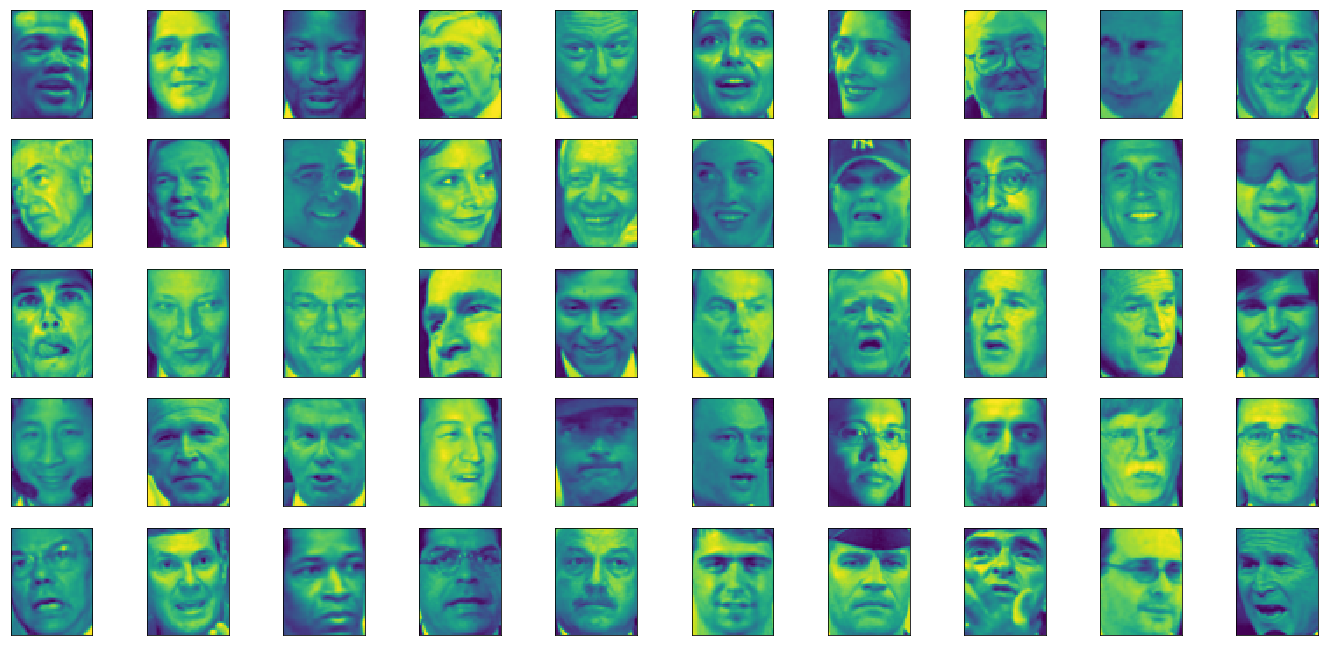

In [5]:
# First 50 images

cols = 10
rows = 5
fig = plt.figure(figsize=(2.5 * cols - 1, 2.5 * rows - 1))

k = 0

for i in range(cols):
    for j in range(rows):

        ax = fig.add_subplot(rows, cols, i * rows + j + 1, xticks=[], yticks=[])
        ax.grid('off')
        im = ax.imshow(X_train[k])
        
        k += 1
        
plt.show()

PCA can be seen as a special case of a Neural Network.

Actually we are going to build an Autoencoder, a NN which is trained to reconstruct input itself.

In [6]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Reshape, Flatten

In [7]:
def make_pca(encoded_dim=64):
    
    # input layer
    inputs  = Input(shape=(62, 47), name='Input')
    flatten = Reshape((62 * 47, ), name='Flatten')(inputs)  # 2914 dim.
    
    # compression layer
    encoded = Dense(encoded_dim, activation='linear', name='Encoded')(flatten)
    
    #decoding layer
    decoded = Dense(62 * 47, activation='linear', name='Decoded')(encoded)
    reshaped  = Reshape((62, 47), name='Reshaped')(decoded)
    
    return Model(inputs, reshaped), Model(inputs, encoded)

In [8]:
pca, pca_encoder = make_pca()

In [14]:
pca.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 62, 47)            0         
_________________________________________________________________
Flatten (Reshape)            (None, 2914)              0         
_________________________________________________________________
Encoded (Dense)              (None, 64)                186560    
_________________________________________________________________
Decoded (Dense)              (None, 2914)              189410    
_________________________________________________________________
Reshaped (Reshape)           (None, 62, 47)            0         
Total params: 375,970
Trainable params: 375,970
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.optimizers import Adamax
from keras.objectives import MSE

In [16]:
pca.compile(optimizer=Adamax(lr=1.0e-3), loss=[MSE])

Now train the model using ``X_train`` itself as target:

In [17]:
pca.fit(X_train, X_train, epochs=16)

Epoch 1/16
11909/11909 [==============================] - 3s 268us/step - loss: 0.0071
Epoch 2/16
11909/11909 [==============================] - 3s 254us/step - loss: 0.0042
Epoch 3/16
11909/11909 [==============================] - 3s 256us/step - loss: 0.0042
Epoch 4/16
11909/11909 [==============================] - 3s 246us/step - loss: 0.0041
Epoch 5/16
11909/11909 [==============================] - 3s 244us/step - loss: 0.0041
Epoch 6/16
11909/11909 [==============================] - 3s 246us/step - loss: 0.0041
Epoch 7/16
11909/11909 [==============================] - 3s 236us/step - loss: 0.0040
Epoch 8/16
11909/11909 [==============================] - 3s 245us/step - loss: 0.0040
Epoch 9/16
11909/11909 [==============================] - 3s 239us/step - loss: 0.0040
Epoch 10/16
11909/11909 [==============================] - 3s 237us/step - loss: 0.0039
Epoch 11/16
11909/11909 [==============================] - 3s 240us/step - loss: 0.0039
Epoch 12/16
11909/11909 [================

Let's evaluate the model on the test sample:

In [18]:
# Get reconstruction of X
X_reco = pca.predict(X_test)

# Get lower-dim encoding of X
code = pca_encoder.predict(X_test)

In [19]:
print('Test MSE:', np.mean((X_reco - X_test) ** 2))

Test MSE: 0.003799395


Let's have a look at the reconstruction compared with the original. For each image we also see its low-dimension encoding:

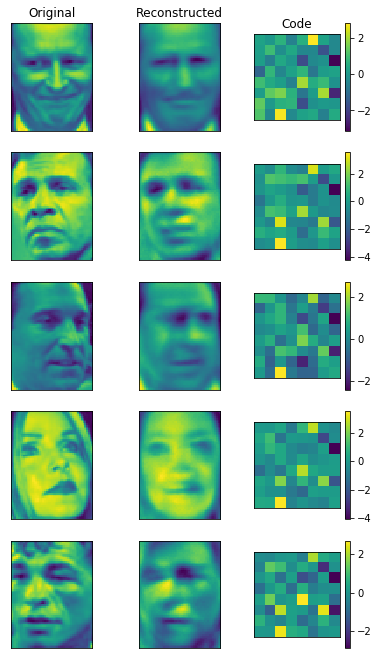

In [29]:
cols = 3
rows = 5
fig = plt.figure(figsize=(2.5 * cols - 1, 2.5 * rows - 1))

k=0

for i in range(rows):

    ax = fig.add_subplot(rows, cols, i * cols + 1, xticks=[], yticks=[])
    ax.grid(None)
    im = ax.imshow(X_test[k])
    if i == 0:
        ax.set_title('Original')
    
    ax = fig.add_subplot(rows, cols, i * cols + 2, xticks=[], yticks=[])
    ax.grid(None)
    im = ax.imshow(X_reco[k])
    if i == 0:
        ax.set_title('Reconstructed')
    
    ax = fig.add_subplot(rows, cols, i * cols + 3, xticks=[], yticks=[])
    ax.grid(None)
    im = ax.imshow(code[k].reshape(8, 8), cmap=plt.cm.viridis)
    cb = fig.colorbar(im)
    if i == 0:
        ax.set_title('Code')
    
    k += 1
    
plt.show()

Try yourself: change the compression of the autoencoder and compare the result.

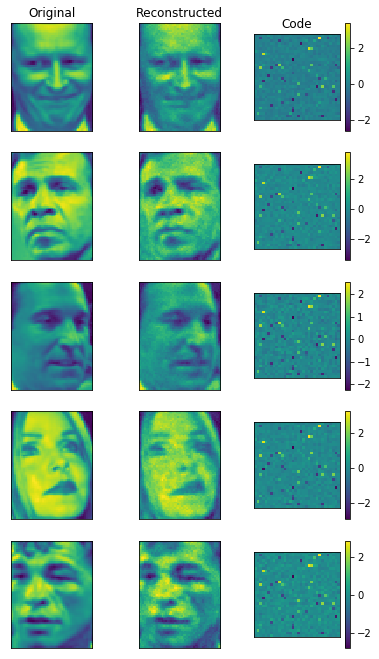

In [36]:
#This is what I got:

We can improve our autoencoder by adding more hidden layer and **non-linearity**.

In [21]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Reshape, BatchNormalization
from keras.activations import relu, elu, tanh
from keras.regularizers import l1, l2
from keras.initializers import Orthogonal, glorot_uniform

In [22]:
def make_autoencoder():
    
    leaky_relu = lambda x: relu(x, alpha=5.0e-2)
    regularization_coef = 1.0e-10
    
    inputs = Input(shape=(62, 47))
    flatten = Reshape((62 * 47, ))(inputs)
    
    dense1 = Dense(
        1024, activation=relu,
        kernel_regularizer=l2(regularization_coef),
        kernel_initializer=Orthogonal(),
    )(flatten)
    
    dense2 = Dense(
        512, activation=leaky_relu,
        kernel_regularizer=l2(regularization_coef),
        kernel_initializer=Orthogonal(),
    )(dense1)
    
    dense3 = Dense(
        256, activation=leaky_relu,
        kernel_regularizer=l2(regularization_coef),
        kernel_initializer=Orthogonal(),
    )(dense2)

    encoded = Dense(
        64, activation=leaky_relu,
        kernel_regularizer=l2(regularization_coef),
        kernel_initializer=Orthogonal(),
        name='encoded'
    )(dense3)
    
    dedense1 = Dense(
        256, activation=leaky_relu,
        kernel_regularizer=l2(regularization_coef),
        kernel_initializer=Orthogonal(),
    )(encoded)
    
    dedense2 = Dense(
        512, activation=leaky_relu,
        kernel_regularizer=l2(regularization_coef),
        kernel_initializer=Orthogonal(),
    )(dedense1)
    
    dedense3 = Dense(
        1024, activation=leaky_relu,
        kernel_regularizer=l2(regularization_coef),
        kernel_initializer=Orthogonal(),
    )(dedense2)
    
    decoded = Dense(
        62 * 47, activation='linear',
        kernel_regularizer=l2(regularization_coef),
        kernel_initializer=Orthogonal(),
    )(dedense3)

    shaped = Reshape((62, 47), name='decoded')(decoded)
    
    return Model(inputs=inputs, outputs=shaped), Model(inputs=inputs, outputs=encoded)

In [23]:
ae, ae_encoder = make_autoencoder()

In [24]:
# autoencoder
ae.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 62, 47)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 2914)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2984960   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
encoded (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1664

In [25]:
from keras.optimizers import Adadelta
from keras.objectives import MSE

In [26]:
ae.compile(optimizer=Adadelta(), loss=MSE)

In [ ]:
ae.fit(X_train, X_train, epochs=30)

In [ ]:
X_reco = ae.predict(X_test)
code   = ae_encoder.predict(X_test)

In [ ]:
print('Test MSE:', np.mean((X_reco - X_test) ** 2))

In [ ]:
cols = 3
rows = 10
fig = plt.figure(figsize=(2.5 * cols - 1, 2.5 * rows - 1))

k = 0

for i in range(rows):


    ax = fig.add_subplot(rows, cols, i * cols + 1, xticks=[], yticks=[])
    ax.grid('off')
    im = ax.imshow(X_test[k])
    if i == 0:
        ax.set_title('Original')
    
    ax = fig.add_subplot(rows, cols, i * cols + 2, xticks=[], yticks=[])
    ax.grid('off')
    im = ax.imshow(X_reco[k])
    if i == 0:
        ax.set_title('Reconstructed')
    
    ax = fig.add_subplot(rows, cols, i * cols + 3, xticks=[], yticks=[])
    ax.grid('off')
    im = ax.imshow(code[k].reshape(8, 8), cmap=plt.cm.viridis)
    cb = fig.colorbar(im)
    if i == 0:
        ax.set_title('Code')
        
    k += 1
    
plt.show()